In [224]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv("https://raw.githubusercontent.com/hype-usp/PS-2023_1/main/Case/Avancado/data/train.csv")

# # Baixar o dataset para uso offline (caso precise)
# with open("titanic.pkl", "wb") as f:
#     pickle.dump(df, f)


# Baixar o dataset para uso offline (caso precise)
with open("titanic.pkl", "rb") as f:
    df = pickle.load(f)

In [225]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [226]:
df.info()
# Há um número imenso de valores faltantes na coluna de cabine, grandes demais para serem substituidos, além de ser um coluna com 
# pouco significado para o case, então será descartada (ele poderia ter mais relevância se viesse junto com alguma outra 
# coluna dando alguma referência quanto a localização da cabine no navio)

# Há uma quantidade considerável de idades faltando, mas podemos preencher usando medianas levando em conta outros atributos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [227]:
# Dropar a coluna de cabin, que possui muitos NAs e não tem tanta significância
# Dropar a coluna de Id e de nome já que não tem tanto uso para nós
df.drop(columns=["Cabin", "PassengerId"], inplace=True)

# Poderíamos dropar também a coluna Ticket, mas vamos mantê-la para fazer alguns testes para ver se ela tem alguma
# significância para predizer os sobreviventes 

In [228]:
df.describe()
# Não há numeros errados no campo de survived (0,1)

# Não aparentam ter idades fora de um range crível

# "Fare" aparenta ter alguns outliers que valem a pena dar uma checada, uma vez que tem um pulo 
# muito grande do terceiro quartil para o valor máximo 



,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


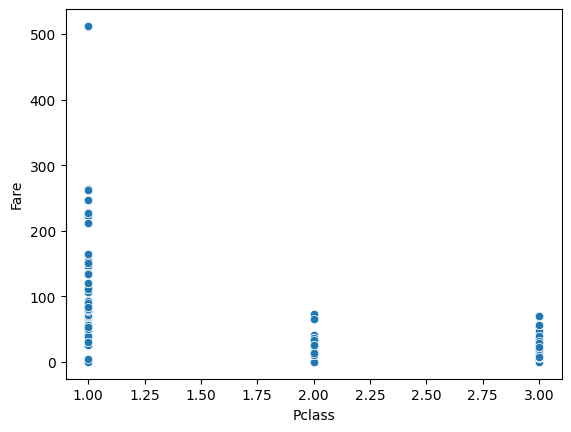

In [229]:
sns.scatterplot(df, x="Pclass", y="Fare");

# Como previsto, mesmo estando em classe alta, há um outlier que gostariamos de apagar

In [230]:
# Esses dois registros de 512 Dólares podem ser problema, para não ter que tirar o registro inteiro, 
# vamos substituir pela média dos tickets mais caros abaixo dos 512 
mean = df.loc[(df['Fare'] > 200) & (df['Fare'] < 300), "Fare"].median()
df.loc[(df['Fare'] > 500), "Fare"] = mean

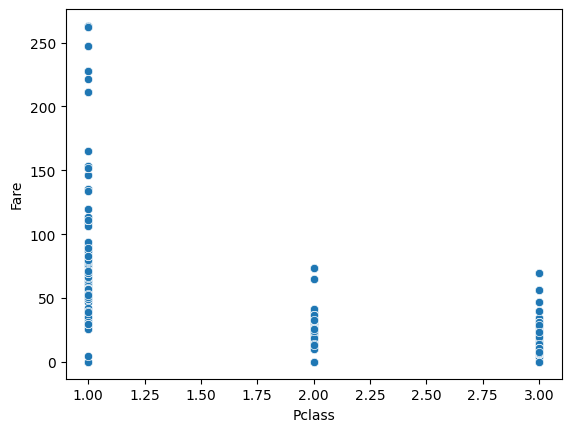

In [231]:
# Melhor!
sns.scatterplot(df, x="Pclass", y="Fare");

In [232]:
# Só pra morrer de certeza que não tem valores fora de (0,1)
df.loc[(df['Survived'] < 1) & (df['Survived'] > 0)] # Nada, tudo ok

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [233]:
df['Sex'].value_counts() # Ok, sem erros

male      577
female    314
Name: Sex, dtype: int64

In [234]:
df['Embarked'].value_counts() # Maravilha, há uma ausência de incorretudes

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [235]:
# Vamos manter essa coluna para algumas análises, mas não será utilizado para o treinamento do modelo, uma vez que não tem tanto significado
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

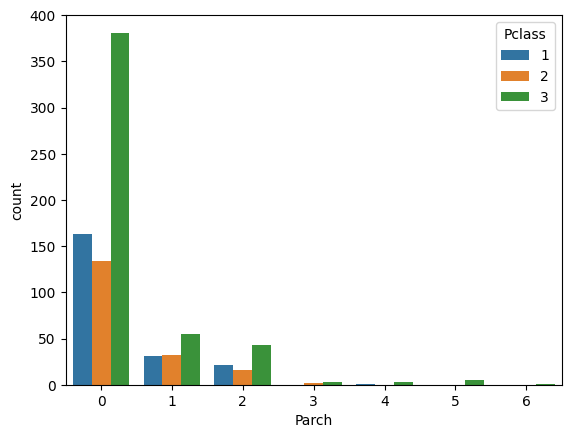

In [236]:
sns.countplot(df, x="Parch", hue="Pclass");

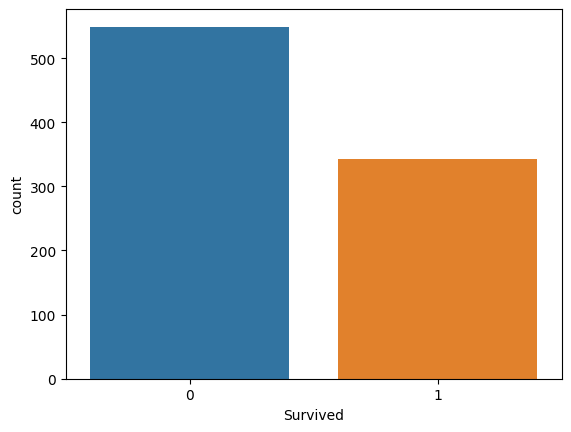

In [237]:
sns.countplot(df, x="Survived");

# Temos uma maior quantidade de pessoas que morreram do que sobreviveram (500+ para ~330) 


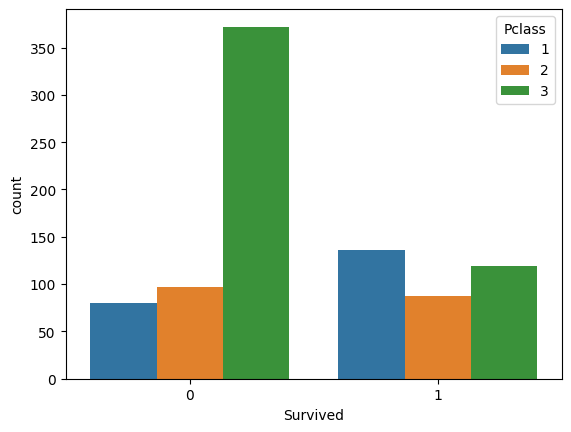

In [238]:
sns.countplot(df, x="Survived", hue="Pclass");

# Das classes, a que mais sobreviveram foram os de Classe A e os de Classe C
# Contudo, por serem em maior número (e possivelmente com menor prioridade), a Classe C foi a que teve maior número de mortes


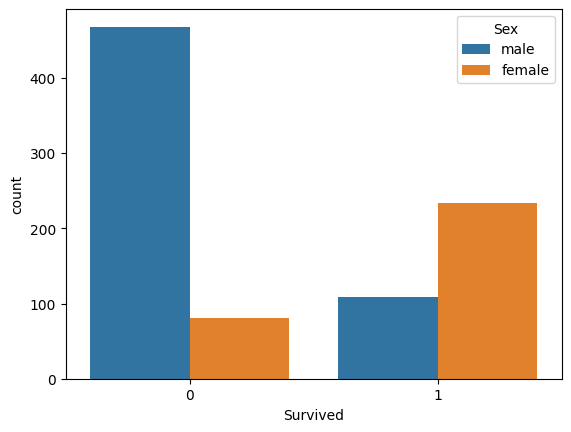

In [239]:
sns.countplot(df, x="Survived", hue="Sex");

# Mulheres foram as que mais sobreviveram, em comparação, os Homens tiveram mais mortes. 
# (Espero que nenhum deles sejam por falta de espaço numa porta-salva-vidas)

In [240]:
df.drop(columns=['Ticket', 'Name'], inplace=True)

In [241]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [242]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df[[x for x in df.columns.tolist() if x != "Survived"]]
y = df['Survived'].copy()

# Colunas numéricas
numerics = ['Age', 'Fare', "Parch", "SibSp"]

# Colunas de Categóricas
categories = [att for att in X.columns.tolist() if att not in numerics]


num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("normalize", StandardScaler())
])

df_num = X[numerics]
num_pipeline.fit_transform(df_num)


full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, numerics),
    ("one_hot", OneHotEncoder(sparse_output=False), categories),
])

X_treated = full_pipeline.fit_transform(X)


In [243]:
from sklearn.model_selection import train_test_split

# Split de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X_treated, y, random_state=42)

In [244]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [245]:
predictions = knn.predict(X_test)

In [246]:
from sklearn.model_selection import cross_val_score

# Bem meh, a gente pode fazer melhor
cross_val_score(knn, X_train, y_train, cv=10).mean()

0.7829941203075531

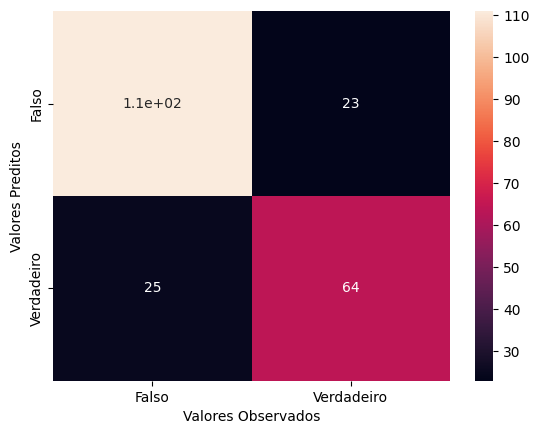

In [247]:
from sklearn.metrics import confusion_matrix

labels = ["Falso", "Verdadeiro"]
cm = sns.heatmap(confusion_matrix(y_test, predictions), xticklabels=labels, yticklabels=labels, annot=True)
cm.set(xlabel="Valores Observados", ylabel="Valores Preditos");

In [248]:

from sklearn.model_selection import GridSearchCV

# Vamos testar uma combinação de k's de 3 até 50
params = {
    "n_neighbors": list(range(3, 51)),
    "weights": ['uniform', 'distance']
}
grid = GridSearchCV(KNeighborsClassifier(), params)
grid.fit(X_train, y_train)
cross_val_score(grid.best_estimator_, X_test, y_test, cv=10).mean()

0.7444664031620555

In [249]:
from sklearn.linear_model import LogisticRegression

# Explorar outros modelos, tentando achar um modelo que dê um score maior
# https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501
params = { 
    'C': [.1, .25, .50, .75, 1],
    'max_iter' : [100, 500, 1000]
}
loggrid = GridSearchCV(LogisticRegression(random_state=42), params)
loggrid.fit(X_train, y_train)
cross_val_score(loggrid.best_estimator_, X_test, y_test, cv=10).mean()



0.7879446640316206

In [250]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier()
params = {
    'criterion': ["gini", "entropy", "log_loss"],
    'n_estimators': [100, 300, 500, 1000],
}

forestgrid = GridSearchCV(RandomForestClassifier(random_state=42), params)
forestgrid.fit(X_train, y_train)
cross_val_score(forestgrid.best_estimator_, X_test, y_test, cv=10).mean()


0.7976284584980238

In [251]:
from sklearn.svm import SVC

params = { 
    'C': [.1, .25, .50, .75, 1],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto']
}
svcgrid = GridSearchCV(SVC(random_state=42), params)
svcgrid.fit(X_train, y_train)
cross_val_score(svcgrid.best_estimator_, X_test, y_test, cv=10).mean()

0.8116600790513836

In [252]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba
params = { 
    'var_smoothing': np.logspace(0,-9, num=100)
}

bayesgrid = GridSearchCV(GaussianNB(), params)
bayesgrid.fit(X_train, y_train)
cross_val_score(bayesgrid.best_estimator_, X_test, y_test, cv=10).mean()

0.7796442687747035

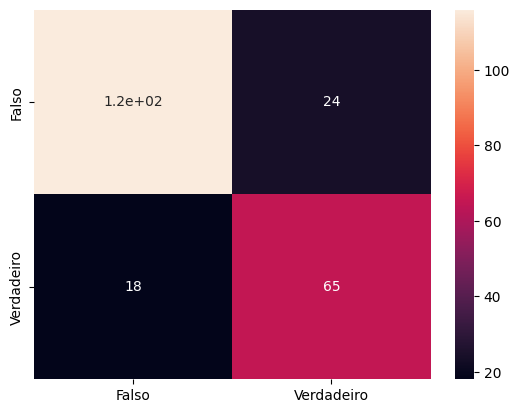

In [254]:
# Testar o melhor modelo
best = svcgrid.best_estimator_

labels = ["Falso", "Verdadeiro"]
sns.heatmap(confusion_matrix(best.predict(X_test), y_test), xticklabels=labels, yticklabels=labels, annot=True)
cm.set(xlabel="Valores Observados", ylabel="Valores Preditos");